We want to highlight 10 wines to increase our sales. Which ones should we choose and why?

In [2]:
#importing the necessary libraries

import sqlite3 as sql
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as staticmethod


In [3]:
#connecting to the database
conn = sql.connect('vivino.db')
cursor = conn.cursor()



In [4]:
#We want to highlight 10 wines to increase our sales. Which ones should we choose and why?
cursor.execute("SELECT name, ratings_average FROM wines ORDER BY ratings_average DESC LIMIT 10")
best_reviews = cursor.fetchall()


for i in best_reviews:
    print(i)

worst_reviews = pd.DataFrame(best_reviews, columns=['name', 'ratings_average'])
worst_reviews.plot(kind='bar', x='name', y='ratings_average')   
plt.show()


OperationalError: no such table: wines

('États-Unis', 12273684)
('France', 5973301)
('Italie', 4270717)
('Allemagne', 2549989)
('Espagne', 2264396)
('Suisse', 1601799)
('Portugal', 1123535)
('Australie', 1022965)
('Argentine', 629532)
('Chili', 326757)
('Afrique du Sud', 269649)
('Roumanie', 228185)
('Israël', 150549)
('Hongrie', 102235)
('Grèce', 95693)
('Croatie', 64223)
('Moldavie', 13583)


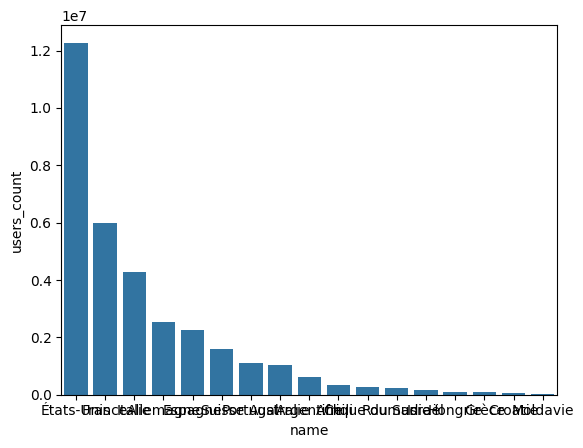

In [ ]:
#We have a limited marketing budget for this year. Which country should we prioritise and why?

# Exécuter la requête pour trouver le pays avec le plus d'utilisateurs
cursor.execute("SELECT name, users_count FROM countries ORDER BY users_count DESC ")
most_users = cursor.fetchall()


# Affichage du résultat
for i in most_users:
    print(i)

most_users = pd.DataFrame(most_users, columns=['name', 'users_count'])
sns.barplot(x='name', y='users_count', data=most_users)
plt.show()




('France', 67553)
('Italie', 42399)
('États-Unis', 28145)
('Espagne', 18026)
('Australie', 13946)
('Allemagne', 13643)
('Portugal', 5834)
('Chili', 5785)
('Argentine', 5339)
('Afrique du Sud', 4227)
('Suisse', 3849)
('Hongrie', 1923)
('Grèce', 1294)
('Croatie', 980)
('Roumanie', 686)
('Israël', 529)
('Moldavie', 418)
The best wineries are: 
Winery ID: 11601, Rating Average: 4.8 Region ID: 3237
Winery ID: 14919, Rating Average: 4.8 Region ID: 105
Winery ID: 156664, Rating Average: 4.8 Region ID: 492
Winery ID: 277785, Rating Average: 4.8 Region ID: 3345
Winery ID: 1235, Rating Average: 4.8 Region ID: 409
Winery ID: 266660, Rating Average: 4.8 Region ID: 3036
Winery ID: 1456, Rating Average: 4.7 Region ID: 25
Winery ID: 1301, Rating Average: 4.7 Region ID: 25
Winery ID: 11050, Rating Average: 4.7 Region ID: 405
Winery ID: 11050, Rating Average: 4.7 Region ID: 405


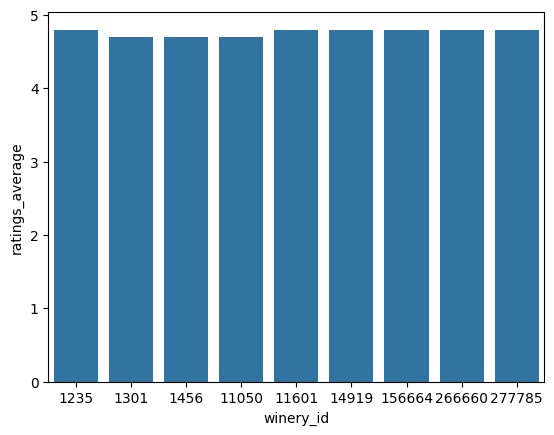

In [ ]:
#We would like to give awards to the best wineries. Come up with 3 relevant ones. Which wineries should we choose and why?

cursor.execute("SELECT name, wineries_count FROM countries ORDER BY wineries_count DESc")  
most_wineries = cursor.fetchall()

for i in most_wineries:
    print(i)    

cursor.execute("SELECT winery_id, ratings_average, region_id FROM wines ORDER BY ratings_average DESC LIMIT 10")
best_wineries = cursor.fetchall()

# Affichage des résultats
print("The best wineries are: ")
for winery in best_wineries:
    print(f"Winery ID: {winery[0]}, Rating Average: {winery[1]}", f"Region ID: {winery[2]}")

best_wineries = pd.DataFrame(best_wineries, columns=['winery_id', 'ratings_average', 'region_id'])
sns.barplot(x='winery_id', y='ratings_average', data=best_wineries)


plt.show()



In [5]:
'''#We would like to select wines that are easy to find all over the world. 
#Find the top 3 most common grapes all over the world and for each grape, give us the the 5 best rated wines.

cursor.execute("SELECT grape_id FROM most_used_grapes_per_country ORDER BY COUNT(grape_id) DESC LIMIT 3")
most_common_grapes = cursor.fetchall()
for i in most_common_grapes:
    print(i)'''

'#We would like to select wines that are easy to find all over the world. \n#Find the top 3 most common grapes all over the world and for each grape, give us the the 5 best rated wines.\n\ncursor.execute("SELECT grape_id FROM most_used_grapes_per_country ORDER BY COUNT(grape_id) DESC LIMIT 3")\nmost_common_grapes = cursor.fetchall()\nfor i in most_common_grapes:\n    print(i)'

           Grape Name Country         Region                   Wine  \
0  Cabernet Sauvignon      es          Rioja     Capellanía Reserva   
1  Cabernet Sauvignon      cl   Maipo Valley                    Red   
2  Cabernet Sauvignon      es          Rioja  Rioja 150 Aniversario   
3  Cabernet Sauvignon      ar        Mendoza                 Malbec   
4  Cabernet Sauvignon      cl  Curico Valley     Conde de Superunda   

   Wine rating average  Wine rating count  
0                  4.1               7314  
1                  4.1               1297  
2                  4.2               4642  
3                  4.2              33640  
4                  4.2               3237  
       Wine rating average  Wine rating count
count           262.000000         262.000000
mean              4.456870        8330.820611
std               0.123838       16391.909007
min               4.100000          27.000000
25%               4.400000         551.250000
50%               4.400000       

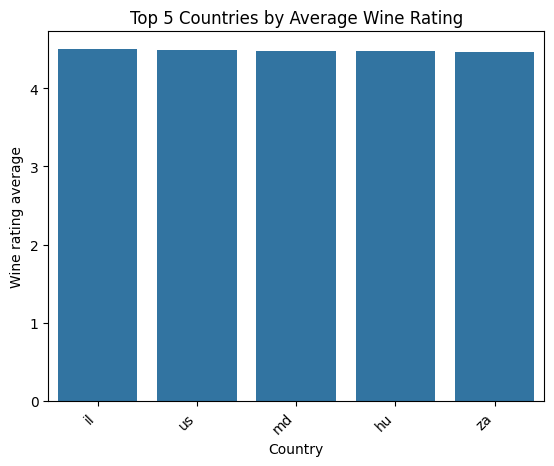

   Country  Wine rating average
7       il             4.500000
10      us             4.490541
8       md             4.480000
6       hu             4.472727
11      za             4.459091


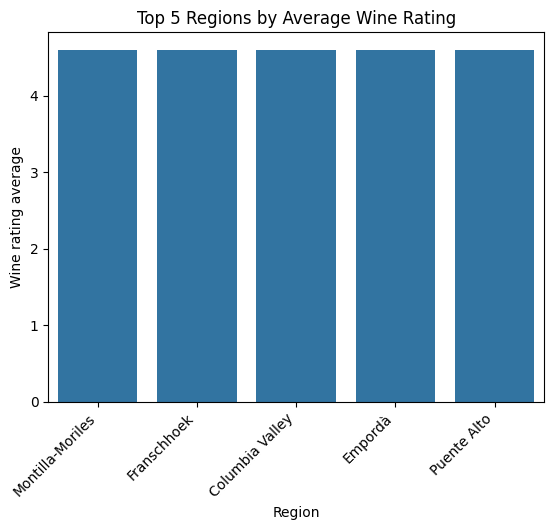

              Region  Wine rating average
40  Montilla-Moriles                  4.6
26       Franschhoek                  4.6
16   Columbia Valley                  4.6
23           Empordà                  4.6
53       Puente Alto                  4.6


In [25]:
#One of our VIP clients likes Cabernet Sauvignon and would like our top 5 recommendations. Which wines would you recommend to him?

df = pd.read_csv('cabernet_by_rating.csv')


print(df.head(5))   
print(df.describe())

# Grouping by 'Wine rating average' and getting the most common 'Country'
dataAgg = df.groupby('Wine rating average')['Country'].agg(lambda x: x.mode()[0]).reset_index()


# Aggregating by 'Country' and calculating the mean of 'Wine rating average'
countryAgg = df.groupby('Country')['Wine rating average'].mean().reset_index()

# Sorting by 'Wine rating average' in descending order to find the top 5 countries
top_5_countries = countryAgg.sort_values(by='Wine rating average', ascending=False).head(5)

sns.barplot(x='Country', y='Wine rating average', data=top_5_countries)
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Countries by Average Wine Rating')
plt.show()

# Display the top 5 countries
print(top_5_countries)





# Assuming your dataframe is named df
dataAgg = df.groupby('Region')['Wine rating average'].mean().reset_index()

# Sort the regions by average wine rating
dataAgg = dataAgg.sort_values(by='Wine rating average', ascending=False)

# Select the top 5 regions
top_5_regions = dataAgg.head(5)

# Plotting the top 5 regions
sns.barplot(x='Region', y='Wine rating average', data=top_5_regions)
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Regions by Average Wine Rating')
plt.show()


# Top 5 Regions
top_3_regions = dataAgg.head(5)
print(top_3_regions)



